# 이미지 분류 - RNN 으로 손글씨 이미지 분류하기

In [14]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

In [15]:
SEED = 34

## 도입전 기본처리

In [16]:
# minist 데이터 살펴보기

minist = keras.datasets.mnist
minist

<module 'tensorflow_core.keras.datasets.mnist' from '/Users/gueunhye/opt/anaconda3/envs/tf/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [17]:
((train_images, train_labels),(test_images,test_labels)) = minist.load_data()

In [18]:
# 데이터 shape 출력해보기

print(f"train_images: {train_images.shape}, train_labels :{train_labels.shape}")
print(f"test_images : {test_images.shape}, test_labels:{test_labels.shape}")

train_images: (60000, 28, 28), train_labels :(60000,)
test_images : (10000, 28, 28), test_labels:(10000,)


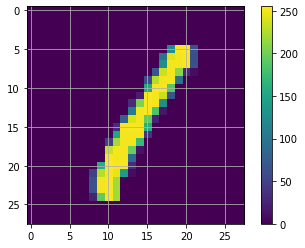

0


In [19]:
# 28,28 형태의 이미지 출력
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(True)
plt.show()
print(train_labels[1])

In [20]:
# train_images에서 0이 아닌 값 출력해보기
list(filter(lambda x: x!= 0, train_images[0].reshape(-1)))[:10]

[3, 18, 18, 18, 126, 136, 175, 26, 166, 255]

In [21]:
print(train_images.dtype)

uint8


## 전처리

In [22]:
# train/test 이미지 데이터의 범위 확인
print(list(filter(lambda x: x != 0, train_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x != 0, train_labels.reshape(-1)))[:10])
print(list(filter(lambda x: x != 0, test_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x != 0, test_labels.reshape(-1)))[:10])

[3, 18, 18, 18, 126, 136, 175, 26, 166, 255]
[5, 4, 1, 9, 2, 1, 3, 1, 4, 3]
[84, 185, 159, 151, 60, 36, 222, 254, 254, 254]
[7, 2, 1, 4, 1, 4, 9, 5, 9, 6]


In [23]:
# train/test 전체 데이터에서 각 images, labels의 min, max를 출력하는 코드를 작성하세요.
print(max(train_images.reshape(-1)), min(train_images.reshape(-1)) )
print(max(test_images.reshape(-1)), min(test_images.reshape(-1)) )

255 0
255 0


In [24]:
# 데이터 타입을 실수형으로 전화하기

test_images.dtype
test_images = test_images.astype(np.float64)
train_images = train_images.astype(np.float64)
print(test_images)
print(train_images.dtype)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
float64


In [25]:
# 데이터 노멀라이즈  0-1 사이의 값을 갖도록 코드 작성
train_images = train_images/255
test_images = test_images/255


In [26]:
# 노멀라이즈 후 데이터 값이 변경되었는지 확인

# 노말라이즈 후 min/max, shape, 0이 아닌 값, dtype 등을 확인하는 코드를 작성해보세요. 
print(list(filter(lambda x: x != 0, train_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x != 0, train_labels.reshape(-1)))[:10])
print(list(filter(lambda x: x != 0, test_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x != 0, test_labels.reshape(-1)))[:10])

[0.011764705882352941, 0.07058823529411765, 0.07058823529411765, 0.07058823529411765, 0.49411764705882355, 0.5333333333333333, 0.6862745098039216, 0.10196078431372549, 0.6509803921568628, 1.0]
[5, 4, 1, 9, 2, 1, 3, 1, 4, 3]
[0.32941176470588235, 0.7254901960784313, 0.6235294117647059, 0.592156862745098, 0.23529411764705882, 0.1411764705882353, 0.8705882352941177, 0.996078431372549, 0.996078431372549, 0.996078431372549]
[7, 2, 1, 4, 1, 4, 9, 5, 9, 6]


## 시각화 방법

In [27]:
train_images[:6].shape

(6, 28, 28)

In [28]:
train_images[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [29]:
train_images[:5].transpose((1,0,2)).shape
#width, height, layer로 바꾸겠다는 의미


(28, 5, 28)

In [30]:
train_images[:5].transpose((1,0,2)).reshape(28,-1)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

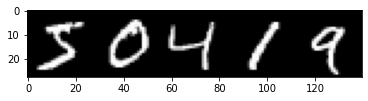

In [31]:
plt.imshow(train_images[:5].transpose((1,0,2)).reshape(28,-1),cmap = 'gray')
plt.show()

In [32]:
print(train_labels[:5])

[5 0 4 1 9]


## Noise 추가 방법

In [33]:
print(np.random.random())
print(np.random.random())
print(np.random.random())

0.8408487766691802
0.4802131172836934
0.8104076114838897


In [34]:
# shape 파라미터 (28,28)로 랜덤 노이즈 생성
random = np.random.random((28,28))  # 랜덤으로 노이즈를 만드는건가
print(np.random.random((28,28)).shape)


(28, 28)


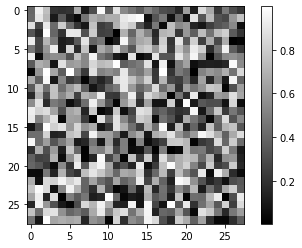

In [35]:
plt.imshow(random, cmap = "gray")
plt.colorbar()
plt.show()

In [36]:
# 가우시안 노이즈를 사용해서 평균 0, 표준편차 0.1, 사이즈 1로 랜덤값을 3번 출력

print(np.random.normal(0.0,0.1,1))
print(np.random.normal(0.0,0.1,1))
print(np.random.normal(0.0,0.1,3))  # 크기가 뭘말하는거지

[-0.04514056]
[-0.03335066]
[ 0.34821784 -0.07603251  0.1793766 ]


In [37]:
# 평균 3, 표준편차 0.01, 사이즈 1인 노이즈
print(np.random.normal(3.0,0.01,1))

[3.00070347]


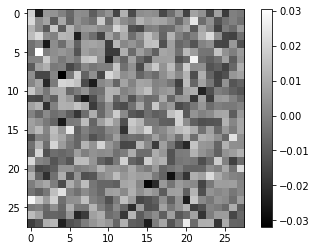

In [38]:
# 가우시안 노이즈 함수를 size(28,28)로 생성해서 plt로 출력해보기

plt.imshow(np.random.normal(0.0, 0.01,(28,28)),cmap = "gray")
plt.colorbar()
plt.show()

In [39]:
train_images[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [40]:
# train_images[5]와 가우시안 노이즈 (28, 28)을 더한 뒤 noisy_image 변수에 할당하는 코드를 작성하세요. mu = 0.5, std = 0.1
noisy_image = train_images[5] + np.random.normal(0.5, 0.1, (28, 28))

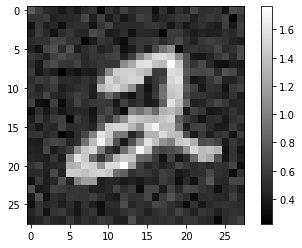

In [41]:

plt.imshow(noisy_image, cmap="gray")
plt.colorbar()
plt.show()

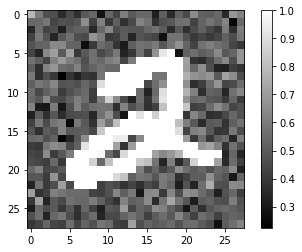

In [42]:
# 노이지 이미지 max 1 안넘게 생성
noisy_image[noisy_image>1.0] = 1.0
plt.imshow(noisy_image,cmap = "gray")
plt.colorbar()
plt.show()

In [43]:
# train_images, test_images에 데이터 노이즈 추가한 이미지 생성
train_noisy_images = train_images+np.random.normal(0.5,0.1,train_images.shape)
train_noisy_images[train_noisy_images>1.0] = 1.0


test_noisy_images = test_images + np.random.normal(0.5, 0.1, test_images.shape)
test_noisy_images[test_noisy_images > 1.0] = 1.0

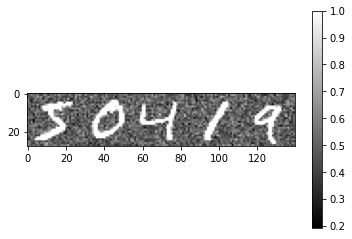

In [44]:
plt.imshow(train_noisy_images[:5].transpose((1,0,2)).reshape(28,-1),cmap = "gray")
plt.colorbar()
plt.show()

In [45]:
#labels에 onehot 인코딩을 적용해서 배치사이즈, 클래스의 개수 shape 변경해보기

In [46]:
from tensorflow.keras.utils import to_categorical
print(train_labels.shape, test_labels.shape)

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
print(train_labels.shape, test_labels.shape)

(60000,) (10000,)
(60000, 10) (10000, 10)


# 모델링

In [47]:
# 모델링
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

In [48]:
inputs = Input(shape = (28,28))
x1 = SimpleRNN(64,activation = "tanh")(inputs)
x2 = Dense(10,activation = "softmax")(x1)
model = Model(inputs,x2)

In [49]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                5952      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 로스, 옵티마이저, 메트릭 설정
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["acc"])

In [51]:
# 모델 학습시켜보기

hist = model.fit(train_noisy_images, train_labels, validation_data = (test_noisy_images,test_labels),epochs = 5, verbose = 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 - 62s - loss: 0.7339 - acc: 0.7559 - val_loss: 0.4295 - val_acc: 0.8646
Epoch 2/5
60000/60000 - 60s - loss: 0.3917 - acc: 0.8806 - val_loss: 0.4286 - val_acc: 0.8638
Epoch 3/5
60000/60000 - 62s - loss: 0.3117 - acc: 0.9061 - val_loss: 0.2715 - val_acc: 0.9173
Epoch 4/5
60000/60000 - 61s - loss: 0.2767 - acc: 0.9169 - val_loss: 0.2566 - val_acc: 0.9225
Epoch 5/5
60000/60000 - 60s - loss: 0.2532 - acc: 0.9259 - val_loss: 0.2356 - val_acc: 0.9315


In [56]:
hist1 = model.fit(train_images, train_labels, validation_data = (test_images, test_labels),epochs = 5, verbose = 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 - 59s - loss: 0.3425 - acc: 0.8958 - val_loss: 0.2628 - val_acc: 0.9198
Epoch 2/5
60000/60000 - 57s - loss: 0.2128 - acc: 0.9372 - val_loss: 0.1572 - val_acc: 0.9531
Epoch 3/5
60000/60000 - 57s - loss: 0.1835 - acc: 0.9461 - val_loss: 0.1946 - val_acc: 0.9396
Epoch 4/5
60000/60000 - 57s - loss: 0.1688 - acc: 0.9502 - val_loss: 0.1638 - val_acc: 0.9538
Epoch 5/5
60000/60000 - 58s - loss: 0.1514 - acc: 0.9563 - val_loss: 0.1640 - val_acc: 0.9502


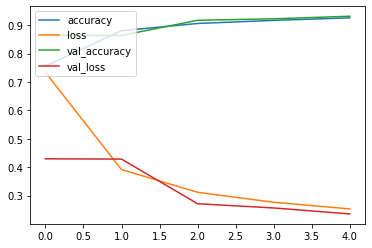

In [54]:
# 학습 진행 사항을 plt로 출력하기
plt.plot(hist.history['acc'],label = 'accuracy')
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_acc'], label = 'val_accuracy')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend(loc = 'upper left')
plt.show()